<a href="https://colab.research.google.com/github/rasool321/Python-CourseWork/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data = pd.read_csv('TeluguMovies_dataset.csv')
df = pd.DataFrame(data)


In [54]:
print(df.shape)       # rows and columns
print(df.describe())  # summary statistics
print(df.isnull().sum())  # missing values check


(1400, 9)
       Unnamed: 0         Year      Runtime       Rating  No.of.Ratings
count   1400.0000  1352.000000  1400.000000  1400.000000    1400.000000
mean     699.5000  2005.013314   121.764286     6.317214    1214.755714
std      404.2895    13.148859    55.925792     1.314660    4328.073152
min        0.0000  1932.000000     0.000000     1.000000      49.000000
25%      349.7500  1997.000000   123.000000     5.500000      92.000000
50%      699.5000  2009.000000   141.000000     6.500000     255.500000
75%     1049.2500  2015.000000   154.000000     7.300000     829.000000
max     1399.0000  2020.000000   300.000000     9.500000   99114.000000
Unnamed: 0         0
Movie              0
Year              48
Certificate      449
Genre             11
Overview         179
Runtime            0
Rating             0
No.of.Ratings      0
dtype: int64


In [55]:
df = df.dropna(subset=['Movie'])  # movie is essential

df['Year'] = df['Year'].fillna(df['Year'].median())
df['Certificate'] = df['Certificate'].fillna('Not Rated')
df['Genre'] = df['Genre'].fillna('Unknown')
df['Overview'] = df['Overview'].fillna('')


In [56]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print(df.dtypes)


Unnamed: 0         int64
Movie             object
Year             float64
Certificate       object
Genre             object
Overview          object
Runtime            int64
Rating           float64
No.of.Ratings      int64
dtype: object


In [57]:
avg_rating = np.mean(df['Rating'])
max_rating = np.max(df['Rating'])
min_rating = np.min(df['Rating'])
std_dev = np.std(df['Rating'])

print("Average Rating:", avg_rating)
print("Max Rating:", max_rating)
print("Min Rating:", min_rating)
print("Standard Deviation:", std_dev)


Average Rating: 6.317214285714286
Max Rating: 9.5
Min Rating: 1.0
Standard Deviation: 1.3141904449166433


In [58]:
print(df.sort_values(by='Rating', ascending=False).head(10))


      Unnamed: 0                               Movie    Year Certificate  \
429          429                            Pichhodu  2019.0          UA   
92            92                         Maya Bazaar  1957.0           U   
96            96                   C/o Kancharapalem  2018.0          UA   
145          145                    Aha Naa Pellanta  1987.0           U   
1383        1383  Screenplay of an Indian Love Story  2020.0           A   
261          261                      Gundamma Katha  1962.0           U   
468          468             Daana Veera Soora Karna  1977.0           U   
1057        1057                               Runam  2019.0          UA   
134          134                     Sagara Sangamam  1983.0           U   
103          103                Nuvvu Naaku Nachchav  2001.0           U   

                                    Genre  \
429                     Drama               
92      Comedy, Drama, Family               
96                      Dram

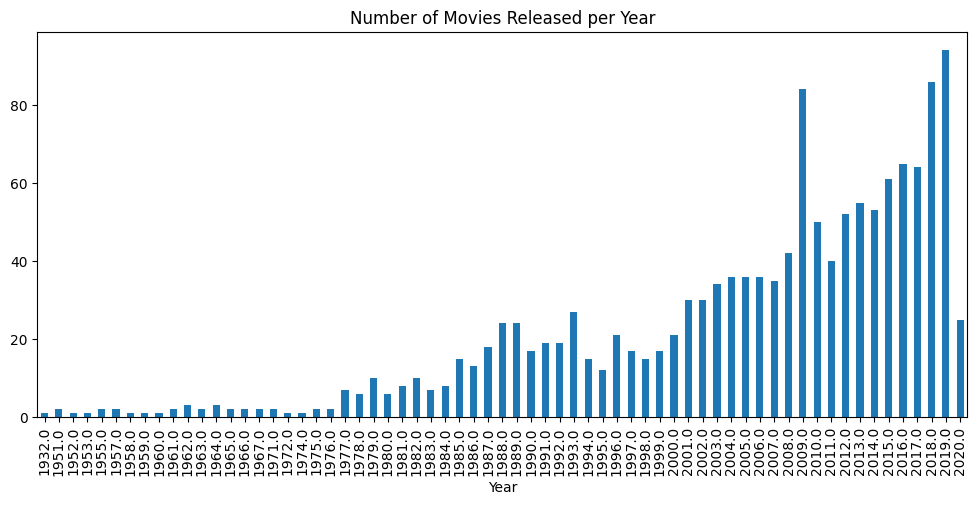

In [59]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Movies Released per Year')
plt.show()


In [60]:
print(df.groupby('Certificate')['Rating'].mean().sort_values(ascending=False))


Certificate
U            6.796795
Unrated      6.285714
A            6.229412
UA           6.125455
U/A          6.075000
Not Rated    5.994481
PG-13        5.400000
Name: Rating, dtype: float64


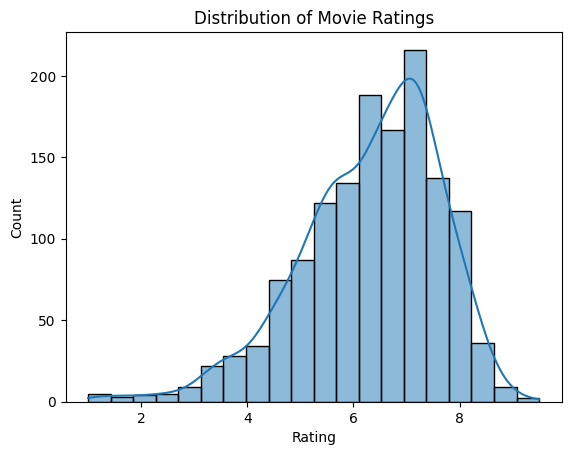

In [61]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()


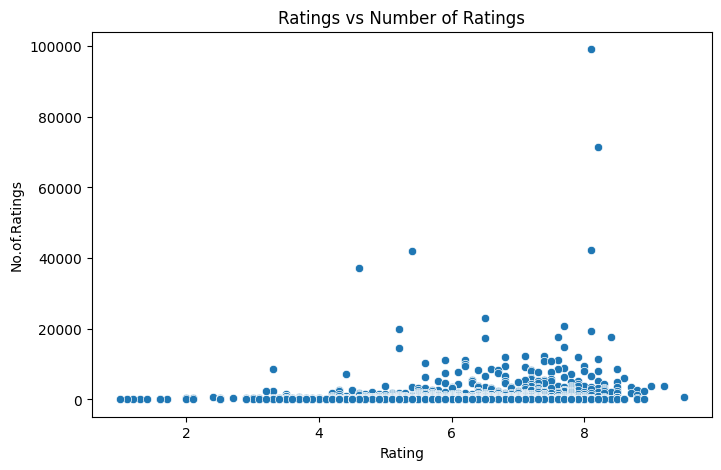

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='No.of.Ratings', data=df)
plt.title("Ratings vs Number of Ratings")
plt.show()


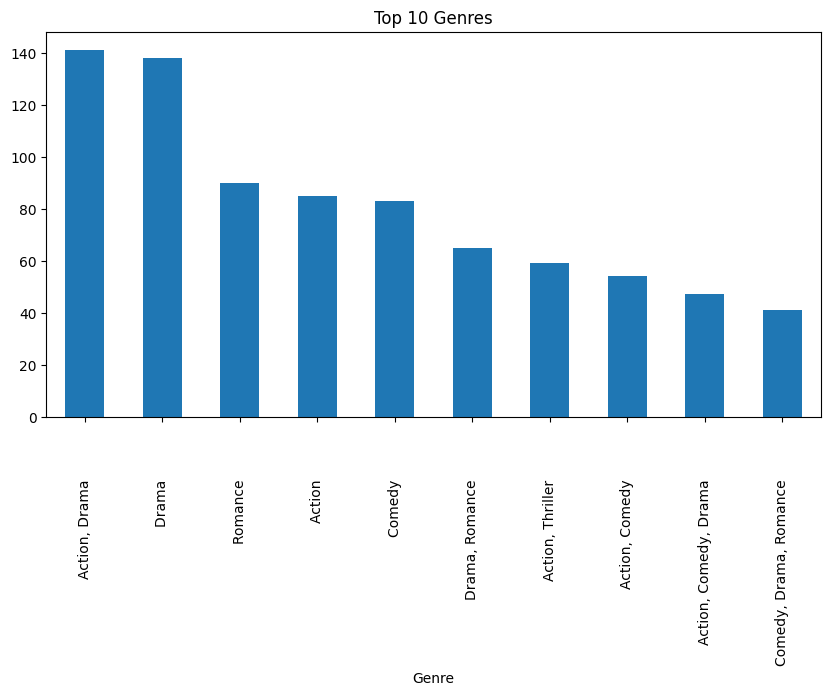

In [63]:
plt.figure(figsize=(10,5))
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.show()


In [64]:
df['Date'] = pd.to_datetime(df['Year'], format='%Y')


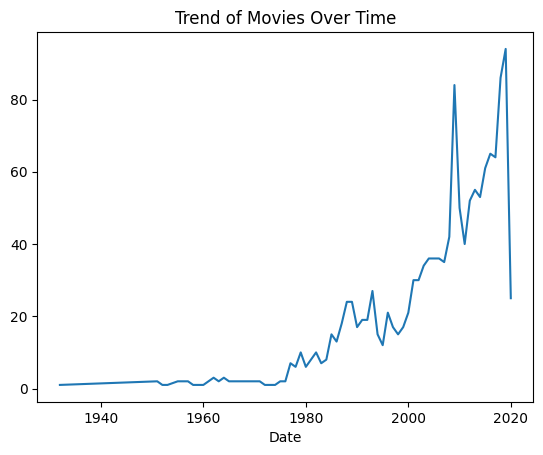

In [65]:
df['Date'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title("Trend of Movies Over Time")
plt.show()


In [66]:
year = int(input("Enter a year to filter movies: "))
filtered = df[df['Date'].dt.year == year]
print(filtered.head())


Enter a year to filter movies: 2000
     Unnamed: 0                         Movie    Year Certificate  \
218         218                         Badri  2000.0           U   
412         412                      Yuvaraju  2000.0   Not Rated   
414         414                        Vamsee  2000.0   Not Rated   
482         482                  Nuvve Kavali  2000.0           U   
525         525  Rayalaseema Ramanna Chowdary  2000.0   Not Rated   

                                  Genre  \
218  Comedy, Drama, Romance               
412                 Romance               
414                  Action               
482                 Romance               
525           Action, Drama               

                                              Overview  Runtime  Rating  \
218      Badri (Pawan Kalyan) is an ad agency direc...      158     7.1   
412      A love traingle.Srinivas(Mahesh Babu) and ...      165     5.7   
414      Vamsee(Mahesh babu) a fashion designer who...      145  